In [154]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [155]:
bos['MEDV']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [156]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [157]:
x=bos.iloc[:,:13]
y=boston.target
# x.head()

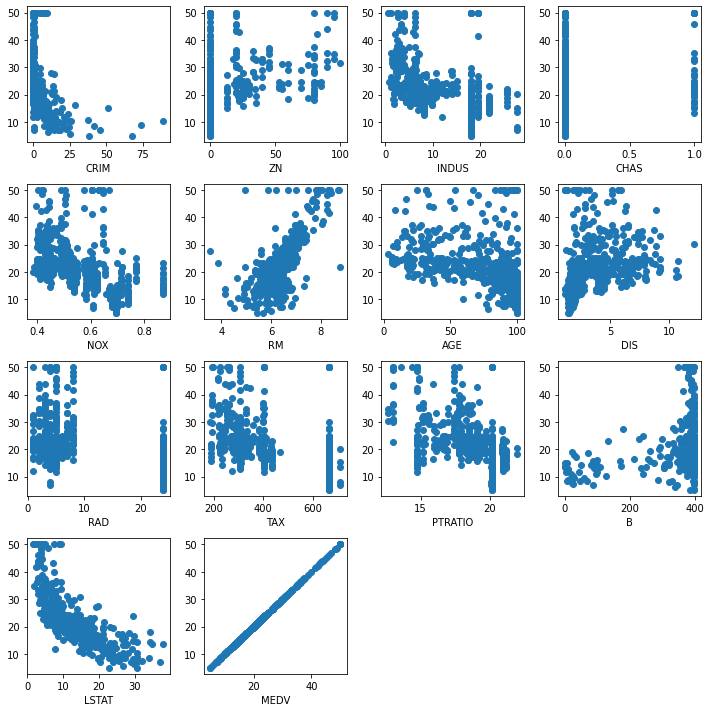

In [158]:
plt.figure(figsize=(10,10), facecolor='w')
plotnumber=1
for column in bos:
    ax=plt.subplot(4,4,plotnumber)
    plt.scatter(bos[column], y)
    plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()

In [159]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled.shape

(506, 13)

In [160]:
# checking for vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x_scaled
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features']=x.columns

In [161]:
vif
#  as none of them is greater than 5 , we are good to go

,vif,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


**Model with all the features**

In [162]:
x_train, x_test, y_train,y_test=train_test_split(x_scaled,y,test_size=0.25 , random_state=350)

In [163]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
y_pred2=linear_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred2))


27.196133529831947


**Model with selected features**

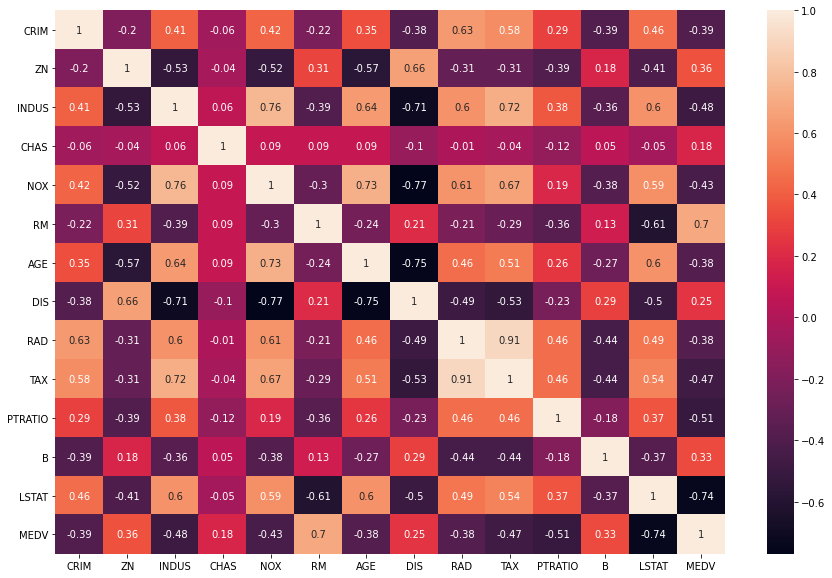

In [165]:
correlation=bos.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation,annot=True)

In [166]:
corr_with_y=abs(correlation['MEDV'])
corr_with_y[corr_with_y>0.5]

RM         0.70
PTRATIO    0.51
LSTAT      0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [167]:
# check for correlation with each other 
print(bos[['RM','PTRATIO']].corr())
print(bos[['RM','LSTAT']].corr())
print(bos[['LSTAT','PTRATIO']].corr())


               RM   PTRATIO
RM       1.000000 -0.355501
PTRATIO -0.355501  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000
            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000


In [168]:
new_df= bos[['LSTAT','RM']]
x_scaled = scaler.fit_transform(new_df)
x_scaled

array([[-1.0755623 ,  0.41367189],
       [-0.49243937,  0.19427445],
       [-1.2087274 ,  1.28271368],
       ...,
       [-0.98304761,  0.98496002],
       [-0.86530163,  0.72567214],
       [-0.66905833, -0.36276709]])

In [169]:

x_train, x_test, y_train,y_test=train_test_split(x_scaled,y,test_size=0.25 , random_state=350)

In [170]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
lin_reg.predict(scaler.transform([[15.3,	4.98]]))

array([14.64541553])

checking accuracy using ols 

In [172]:
# from statsmodels.formula.api import smf 
import statsmodels.formula.api as smf
lm= smf.ols(formula='MEDV ~ LSTAT+RM', data=bos).fit()

In [173]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          7.01e-112
Time:                        20:10:05   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
RM             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
y_pred=lin_reg.predict(x_test)

In [175]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

33.46749691976621
